In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

# **Load the Data**

In [2]:
plain_price = pd.read_csv("/kaggle/input/plane-price-prediction/Plane Price.csv")
plain_price_df = plain_price.copy()
plain_price_df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


# **Data Preparation**

In [3]:
plain_price_df.isna().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

In [4]:
plain_price_df = plain_price_df.dropna()

In [5]:
plain_price_df.shape

(421, 16)

In [6]:
plain_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               421 non-null    object 
 1   Engine Type              421 non-null    object 
 2   HP or lbs thr ea engine  421 non-null    object 
 3   Max speed Knots          421 non-null    object 
 4   Rcmnd cruise Knots       421 non-null    float64
 5   Stall Knots dirty        421 non-null    float64
 6   Fuel gal/lbs             421 non-null    int64  
 7   All eng rate of climb    421 non-null    object 
 8   Eng out rate of climb    421 non-null    float64
 9   Takeoff over 50ft        421 non-null    float64
 10  Landing over 50ft        421 non-null    object 
 11  Empty weight lbs         421 non-null    object 
 12  Length ft/in             421 non-null    object 
 13  Wing span ft/in          421 non-null    object 
 14  Range N.M.               421 no

In [7]:
def clean1(x):
    if isinstance(x, str):
        return(x.replace('.', '').replace(' Mach', ''))
    return(x)
plain_price_df['Max speed Knots'] = plain_price_df['Max speed Knots'].apply(clean1)

In [8]:
plain_price_df['All eng rate of climb'] = plain_price_df['All eng rate of climb'].replace('w/3bld', '')

In [9]:
def ft_in(x):
    if isinstance(x, str):
        return(x.replace('/', '.'))
    return(x)
plain_price_df['Length ft/in'] = plain_price_df['Length ft/in'].apply(ft_in).astype('float')
plain_price_df['Wing span ft/in'] = plain_price_df['Wing span ft/in'].apply(ft_in).astype('float')

In [10]:
plain_price_df[['Max speed Knots','HP or lbs thr ea engine','All eng rate of climb','Landing over 50ft','Empty weight lbs','Range N.M.']] = plain_price_df[['Max speed Knots','HP or lbs thr ea engine','All eng rate of climb','Landing over 50ft','Empty weight lbs','Range N.M.']].apply(lambda x: x.str.replace(',', ''))

In [11]:
plain_price_df[['Max speed Knots','HP or lbs thr ea engine','All eng rate of climb','Landing over 50ft','Empty weight lbs','Range N.M.']] = plain_price_df[['Max speed Knots','HP or lbs thr ea engine','All eng rate of climb','Landing over 50ft','Empty weight lbs','Range N.M.']].apply(pd.to_numeric,errors='coerce')

In [12]:
plain_price_df = plain_price_df.drop(['Model Name','Engine Type'],axis=1)

# **Correlation plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

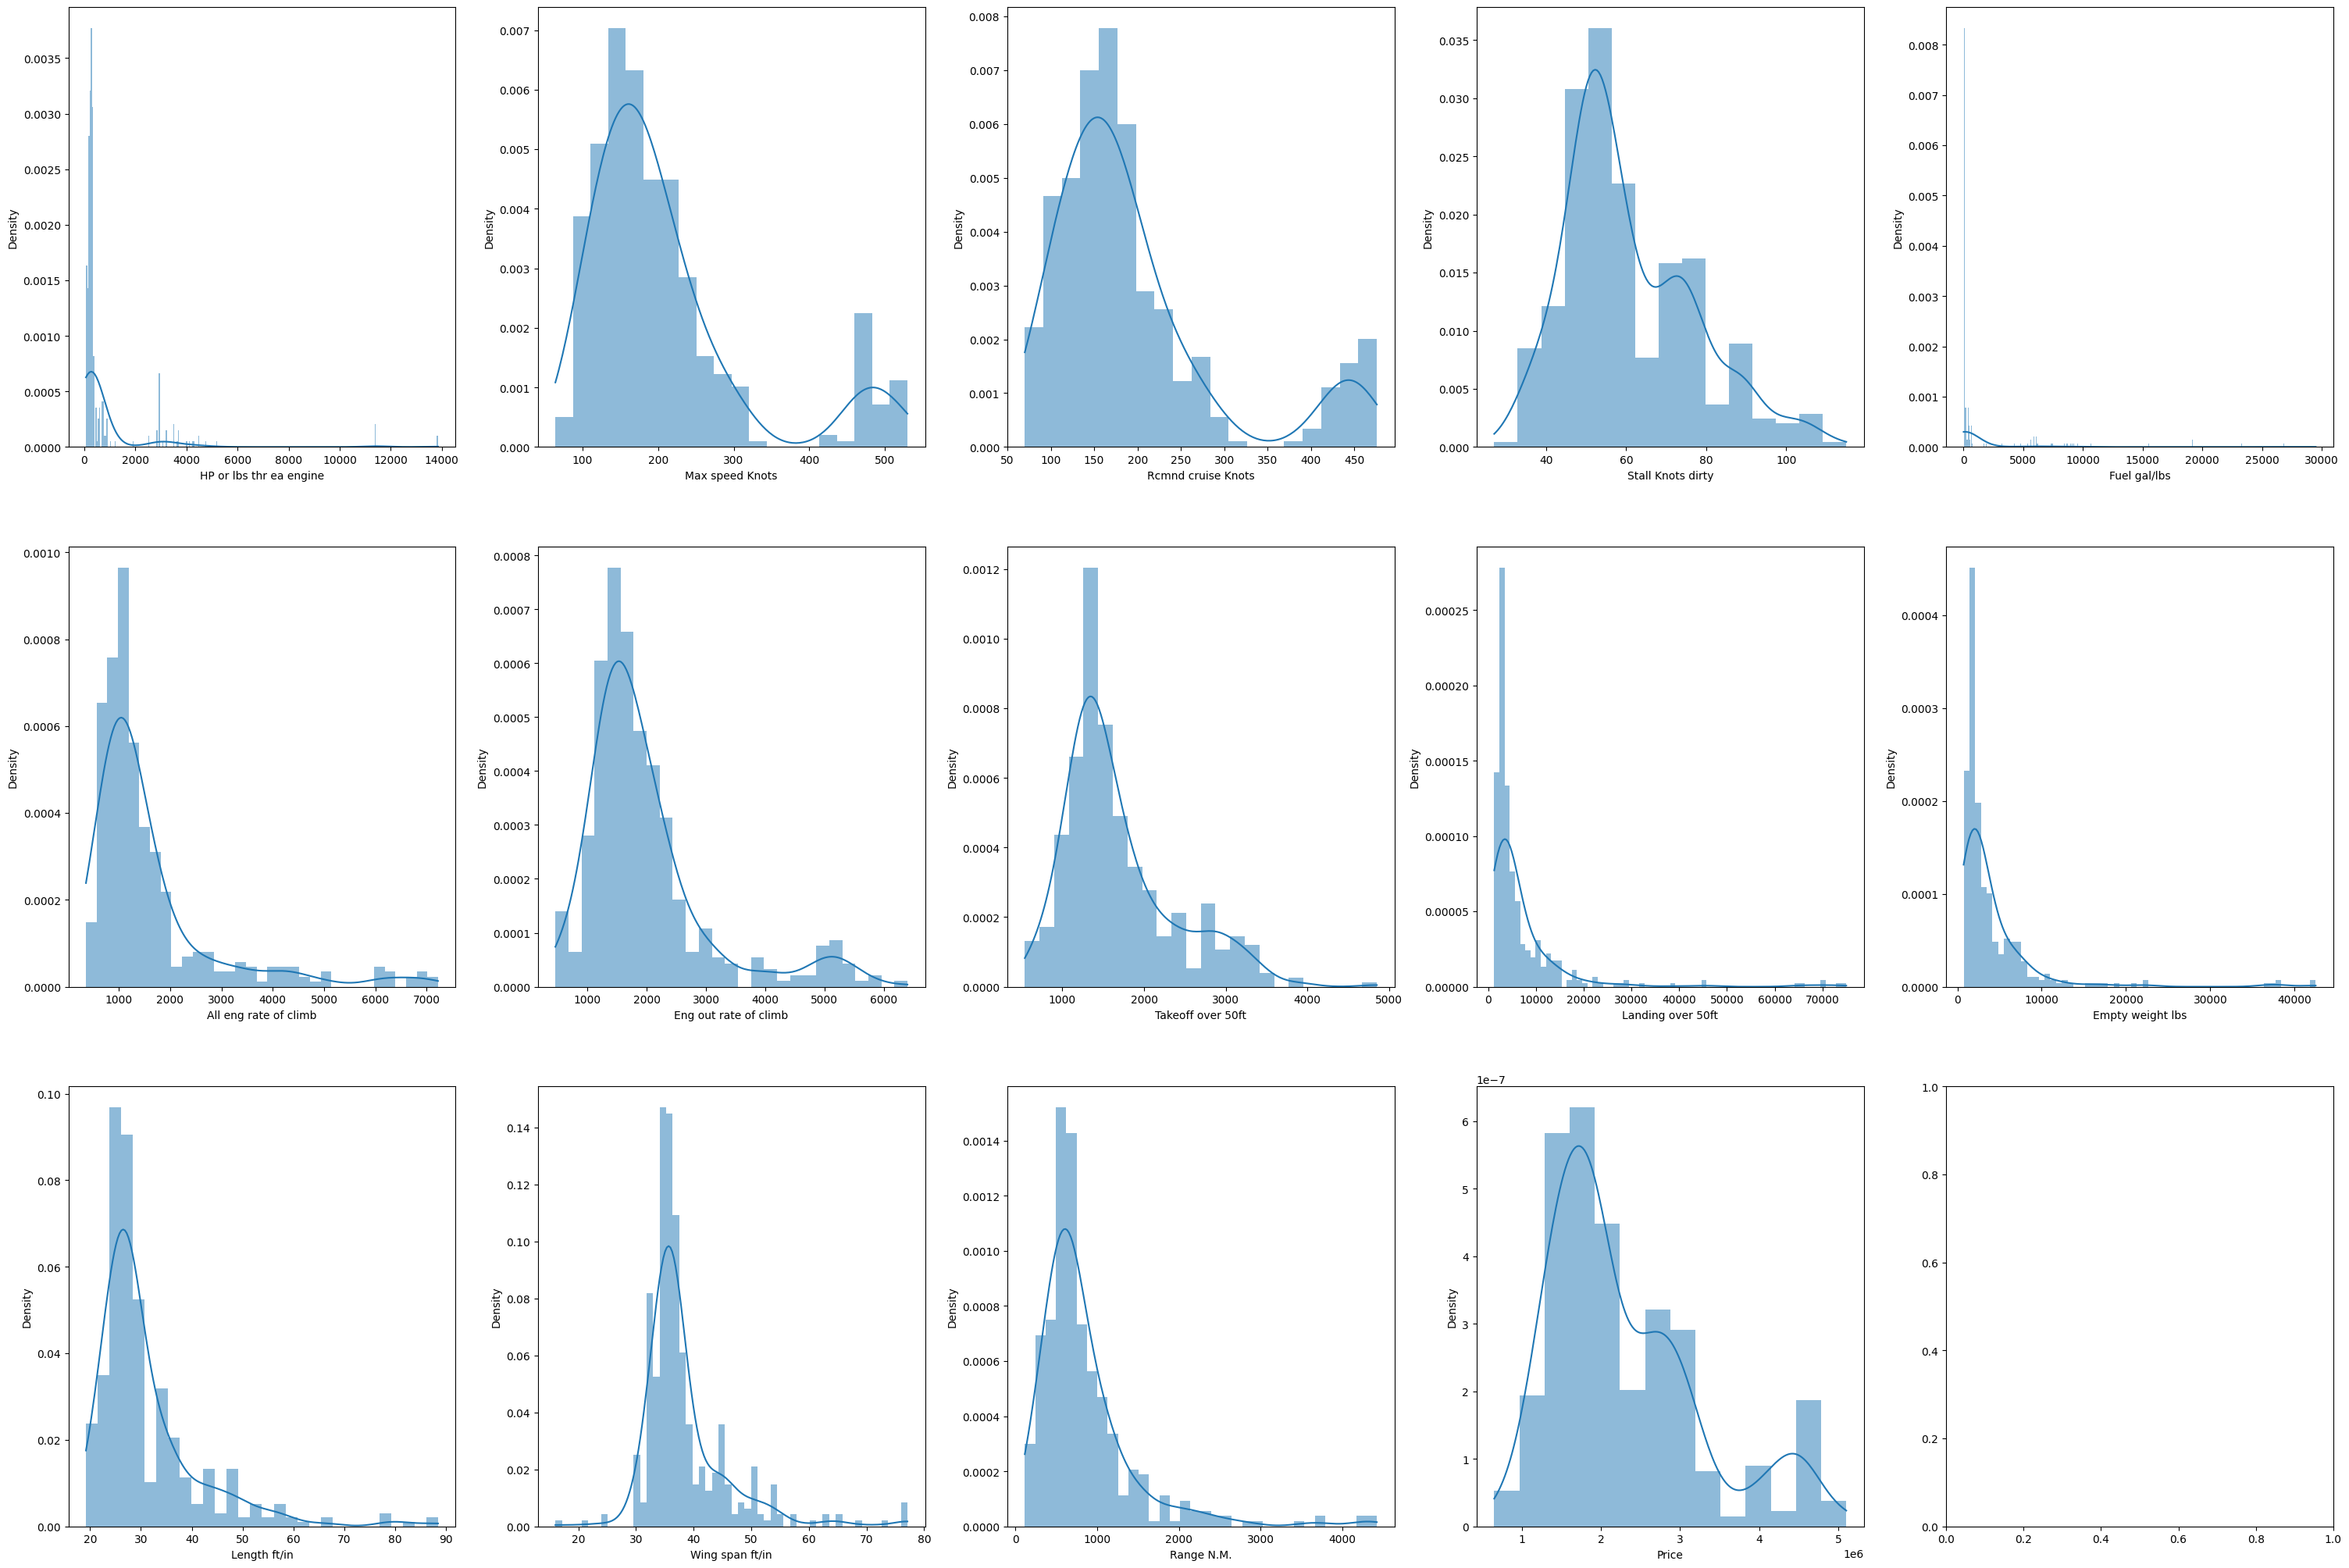

In [13]:
fig,axs = plt.subplots(ncols = 5, nrows = 3, figsize = (30,20))
index = 0
axs = axs.flatten()
for k, v in plain_price_df.items():
  sns.histplot(v, ax = axs[index], kde=True, stat = 'density', linewidth = 0)
  index += 1
plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad = 5.0)

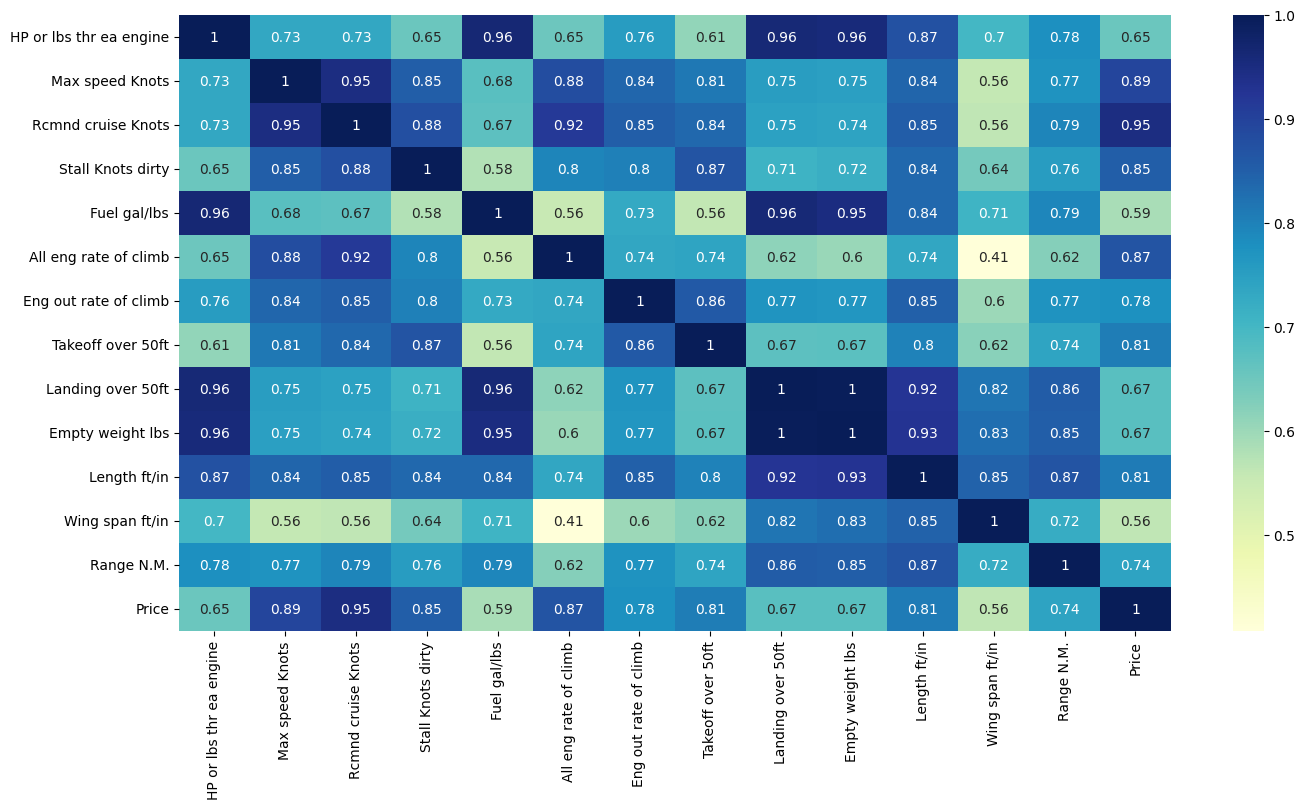

In [14]:
plt.figure(figsize = (16,8))
sns.heatmap(plain_price_df.corr().abs(),annot=True, cmap='YlGnBu')
plt.show()

In [15]:
plain_price_df = plain_price_df.dropna()

In [16]:
plain_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 516
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP or lbs thr ea engine  418 non-null    float64
 1   Max speed Knots          418 non-null    int64  
 2   Rcmnd cruise Knots       418 non-null    float64
 3   Stall Knots dirty        418 non-null    float64
 4   Fuel gal/lbs             418 non-null    int64  
 5   All eng rate of climb    418 non-null    float64
 6   Eng out rate of climb    418 non-null    float64
 7   Takeoff over 50ft        418 non-null    float64
 8   Landing over 50ft        418 non-null    int64  
 9   Empty weight lbs         418 non-null    int64  
 10  Length ft/in             418 non-null    float64
 11  Wing span ft/in          418 non-null    float64
 12  Range N.M.               418 non-null    int64  
 13  Price                    418 non-null    float64
dtypes: float64(9), int64(5)
memory 

In [17]:
numeric_columns = (list(plain_price_df.loc[:, 'HP or lbs thr ea engine':'Price']))

# **Looking for Outliers**

In [18]:
from collections import Counter
def is_outliers (df,n,data):
    outlier_list = []

    for column in data:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [19]:
is_outliers = is_outliers(plain_price_df,1,numeric_columns)

plain_price_df_clean = plain_price_df.drop(is_outliers, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 5


In [20]:
for k, v in plain_price_df_clean.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 +1.5 *iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(plain_price_df_clean)[0]
  print("%s Outliers = %.2f%%" %(k,perc))

HP or lbs thr ea engine Outliers = 1.77%
Max speed Knots Outliers = 0.00%
Rcmnd cruise Knots Outliers = 0.00%
Stall Knots dirty Outliers = 1.77%
Fuel gal/lbs Outliers = 8.26%
All eng rate of climb Outliers = 1.77%
Eng out rate of climb Outliers = 0.59%
Takeoff over 50ft Outliers = 4.72%
Landing over 50ft Outliers = 5.31%
Empty weight lbs Outliers = 5.31%
Length ft/in Outliers = 4.72%
Wing span ft/in Outliers = 12.09%
Range N.M. Outliers = 1.77%
Price Outliers = 0.00%


# **Data Standartization**

In [21]:
d = preprocessing.normalize(plain_price_df_clean, axis=0)
scaled_df = pd.DataFrame(d, columns=plain_price_df_clean.columns)
scaled_df.head()

,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0.030284,0.032698,0.030713,0.044569,0.019066,0.020967,0.029249,0.046754,0.026757,0.024957,0.050071,0.055825,0.029126,0.035069
1,0.017753,0.027982,0.028013,0.042631,0.007944,0.027956,0.023399,0.028771,0.017620,0.017343,0.040967,0.053741,0.014957,0.033181
2,0.018797,0.028296,0.026325,0.035849,0.010063,0.030285,0.015437,0.030570,0.016968,0.017132,0.042550,0.052103,0.016531,0.043162
3,0.017753,0.027667,0.026325,0.035849,0.010063,0.028887,0.016250,0.030570,0.016968,0.016920,0.042550,0.052103,0.016531,0.035069
4,0.013575,0.026095,0.024975,0.031974,0.007415,0.017239,0.020539,0.031828,0.015924,0.015651,0.042550,0.052103,0.013776,0.033720


# **Model Training**

In [22]:
X = scaled_df.drop(columns='Price', axis=1)
Y = scaled_df['Price']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.3)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, Y_train)

LinearRegression()

# **Model Evaluation**

In [26]:
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)

In [27]:
train_mae = mean_absolute_error(Y_train, Train_pred)
test_mae = mean_absolute_error(Y_test, Test_pred)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.00545171404096991
Test MAE: 0.0057789911271603905


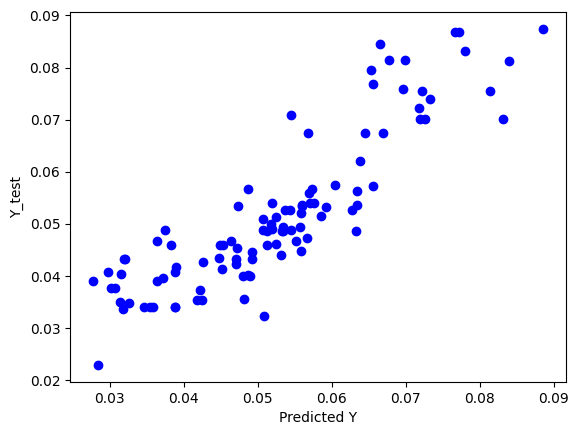

In [28]:
plt.scatter(Test_pred,Y_test, c='b')
plt.xlabel('Predicted Y')
plt.ylabel('Y_test')
plt.show()

In [29]:
r_sq = model.score(X_train, Y_train)
print(r_sq)

0.8069260596078314
